In [1]:
%%capture
! pip install pytorch-lightning==1.4.4
! pip install transformers==4.3.0
! pip install sentencepiece==0.1.96
! pip install torch==1.9.0+cu102
! pip install torchmetrics==0.5.0         
! pip install torchsummary==1.5.1
! pip install torchtext==0.10.0         
! pip install torchvision==0.10.0+cu102

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/graphite/keyword_category_prediction_api

/content/drive/MyDrive/graphite/keyword_category_prediction_api


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get results

In [5]:
lr_avg_precision = pd.read_csv("assets/logistic_regression/avg_precision_results.csv", index_col=0)
svm_avg_precision = pd.read_csv("assets/support_vector_machine/avg_precision_results.csv", index_col=0)
rf_avg_precision = pd.read_csv("assets/random_forest/avg_precision_results.csv", index_col=0)
bert_avg_precision = pd.read_csv("assets/bert_final_training/2021-09-08_11-41-57.089601/avg_precision_results.csv", index_col=0)

lr_auc_roc = pd.read_csv("assets/logistic_regression/auc_roc_results.csv", index_col=0)
svm_auc_roc = pd.read_csv("assets/support_vector_machine/auc_roc_results.csv", index_col=0)
rf_auc_roc = pd.read_csv("assets/random_forest/auc_roc_results.csv", index_col=0)
bert_auc_roc = pd.read_csv("assets/bert_final_training/2021-09-08_11-41-57.089601/auc_roc_results.csv", index_col=0)

avg_precision_results = pd.concat([lr_avg_precision, svm_avg_precision, rf_avg_precision, bert_avg_precision], axis=1)
auc_roc_results = pd.concat([lr_auc_roc, svm_auc_roc, rf_auc_roc, bert_auc_roc], axis=1)

# Average precision

Text(0.5, 0, 'Category')

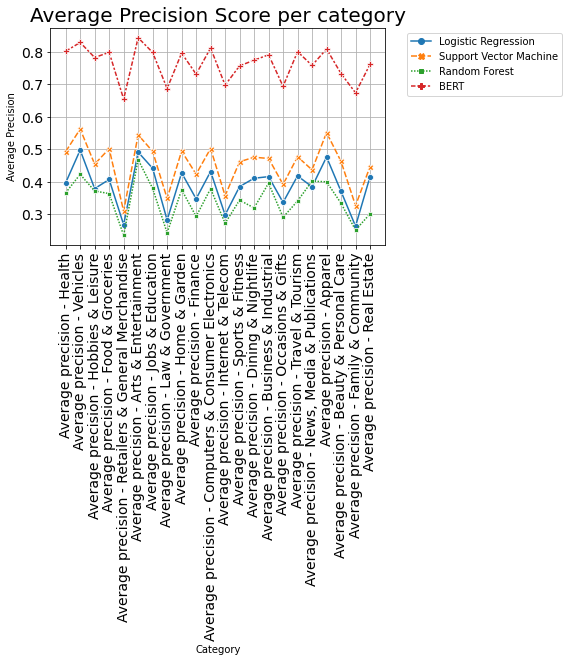

In [6]:
sns.lineplot(data=avg_precision_results, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Average Precision Score per category', fontsize=20)
plt.grid()
plt.ylabel('Average Precision')
plt.xlabel('Category')

# Mean average precision

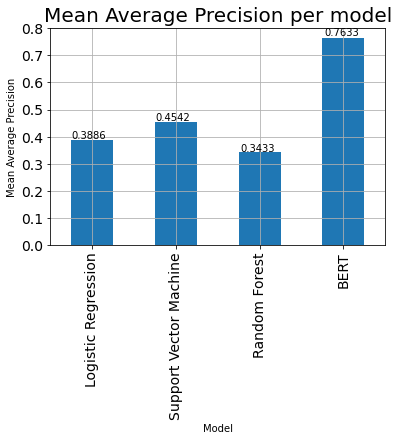

In [7]:
ax = avg_precision_results.mean().plot.bar()
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean Average Precision per model', fontsize=20)
plt.grid()
plt.ylabel('Mean Average Precision')
plt.xlabel('Model')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 4)), (p.get_x() * 1.01, p.get_height() * 1.01))


# AUC ROC

Text(0.5, 0, 'Category')

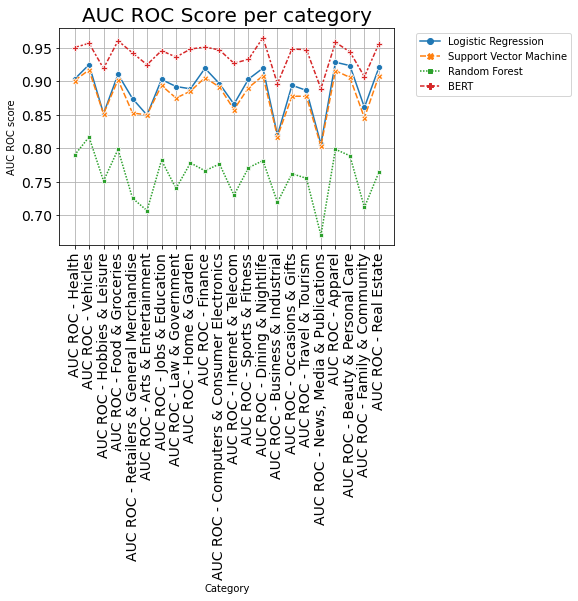

In [8]:
sns.lineplot(data=auc_roc_results, markers=True)
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('AUC ROC Score per category', fontsize=20)
plt.grid()
plt.ylabel('AUC ROC score')
plt.xlabel('Category')

# Mean AUC ROC

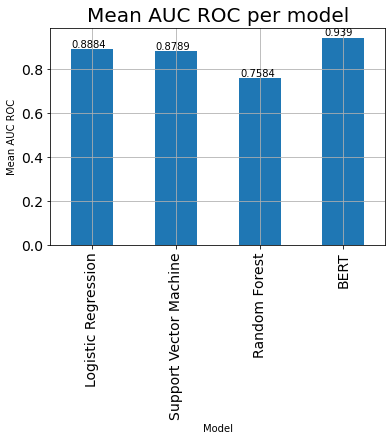

In [9]:
ax = auc_roc_results.mean().plot.bar()
plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Mean AUC ROC per model', fontsize=20)
plt.grid()
plt.ylabel('Mean AUC ROC')
plt.xlabel('Model')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 4)), (p.get_x() * 1.01, p.get_height() * 1.01))
